## Machine Learning
Machine learning is set of techniques to make computers better at doing things that humans can do better than machines , and the way machine learning do that is making machies learn things like humans do 

machine learning is  a  quite broader term , it is a complete science of field in computer science where we use various techniques such as (deeplearning and mathematicals statistical models )

### [Linear Regression ](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

what is linear Regression : it model that fits a linear model with coefiicients to minimize the residual sum  of squares (delta) between the observed target(actual data points) in the dataset and the targets predicted by our linear approxiamation

the distance from a line to a data point is called a **Residual** 

![image](./images/deltaInLinearEquation.png)

<br>
<br>

![image](./images/linearEquation.png)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
dataFrame = pd.read_csv("./data/canada_per_capita_income.csv")
dataFrame.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


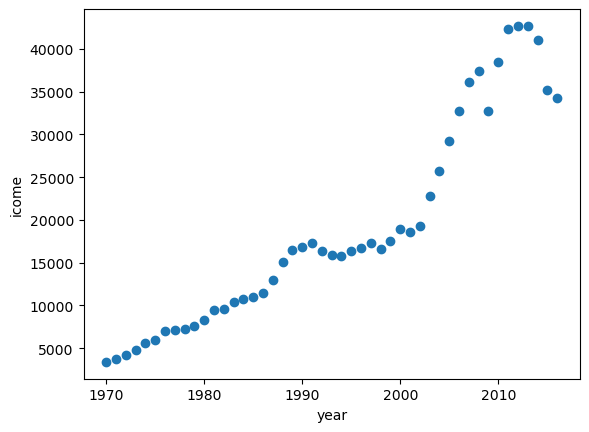

In [3]:
%matplotlib inline 
plt.ylabel("icome")
plt.xlabel("year")
plt.scatter(dataFrame["year"],dataFrame["per capita income (US$)"])

## here we can see if our data is suitable for linear regression model 

In [4]:
x= dataFrame[["year"]]
x2=dataFrame["year"]
y= dataFrame["per capita income (US$)"]
print(type(x))
print(type(x2))
print(x.shape)
print(x2.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(47, 1)
(47,)


In [5]:
print(y)


0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: per capita income (US$), dtype: float64


In [6]:
linearReg = linear_model.LinearRegression()

linearReg.fit(x,y)## there it is gave me a problem util i gave it x as dataFrame 


LinearRegression()

for any linear equation there is slop(M there is call coeficient) and Intercept(b) 

In [7]:

linearReg.coef_## for any linear equation there is slop(M there is call coeficient) and Intercept(b) 
linearReg.intercept_#  b 



-1632210.7578554575

In [8]:
## How Predict work is y = mx + b which means => coef*year + intercept = predict 

xPredict =linearReg.predict(x) # shape should be (nsample, n features )


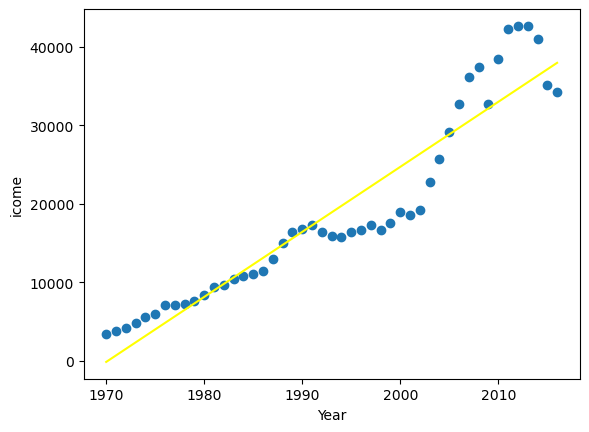

In [9]:
##how linear regression line will look 
%matplotlib inline 
plt.xlabel("Year")
plt.ylabel("icome")
plt.scatter(dataFrame["year"],dataFrame["per capita income (US$)"])
plt.plot(dataFrame["year"],xPredict,color="yellow")

In [10]:
linearReg.predict([[2020]])

array([41288.69409442])

In [11]:
dataFrame

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [12]:
dataFrame.loc[len(dataFrame)]=[2020,linearReg.predict([[2020]])[0]]

### Multivariate Regression (linear Regression with multiple variables )

In [13]:
## first of all import all packages that we need
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [14]:
## import your data 
dataFrame = pd.read_csv("./data/hiring.csv")
dataFrame

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [15]:
## in above data frame we have experience data as string and we cannot modeling string data so we should convert it to numbers after fill NaN data with mean as integer .
import math
dataFrame["experience"] =dataFrame["experience"].fillna("zero")
dataFrame["test_score(out of 10)"]= dataFrame['test_score(out of 10)'].fillna(math.floor(dataFrame["test_score(out of 10)"].mean()))
dataFrame




,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


after preprocessing the data now we should convert strings to number using [word2Number](https://pypi.org/project/word2number/)

In [16]:
from word2number import w2n

dataFrame["experience"]

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [17]:
x = [w2n.word_to_num(i) for i in dataFrame["experience"]] 


In [18]:
dataFrame["experience"] = x
dataFrame

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [19]:
x = dataFrame.drop("salary($)",axis=1)## axis one mean columns 
type(x)
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [20]:
y= dataFrame["salary($)"]
type(y)

pandas.core.series.Series

In [21]:
## now our data is ready to fit into model our target value is salary so 

linearReg =linear_model.LinearRegression()
linearReg.fit(x,y)

LinearRegression()

In [22]:
linearReg.predict([[2,9,6]])


array([53713.86677124])

In [36]:
linearReg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [23]:
linearReg.predict([[12,10,10]])

array([93747.79628651])

### Gradient Descent 

In [24]:
import numpy as np 

## we have values of x and y vectores and we want to derive 
#  the best fit line of equation  using m and b

def gradient_des(x,y): 
  #the theory is we start with  some values of m and b then  takes baby steps
  # to reach the global minimum 
  m_cur=b_cur=0
  learningRate =0.001 # try and error 
  n = len(x) # here we assume that x and y have the same length
  iterations=1000 # can specify with try and error approach
  for i in range(iterations):
    y_predicted = m_cur * x + b_cur
    cost = (1/n) * sum([value**2 for value in (y-y_predicted)])
    mDerivative = -(2/n) * sum(x * (y - y_predicted))
    bDerivative = -(2/n) * sum(y - y_predicted)
    m_cur = m_cur - learningRate * mDerivative
    b_cur = b_cur - learningRate * bDerivative
    print("m {} , b {}  , iteration {} , cost {} ".format(m_cur,b_cur,i, cost))

## we will use numpy array because matrix multiplication is very convenient  and becasue is faster

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_des(x,y)


m 0.062 , b 0.018000000000000002  , iteration 0 , cost 89.0 
m 0.122528 , b 0.035592000000000006  , iteration 1 , cost 84.881304 
m 0.181618832 , b 0.052785648000000004  , iteration 2 , cost 80.955185108544 
m 0.239306503808 , b 0.069590363712  , iteration 3 , cost 77.21263768455901 
m 0.29562421854195203 , b 0.086015343961728  , iteration 4 , cost 73.64507722605434 
m 0.35060439367025875 , b 0.10206956796255283  , iteration 5 , cost 70.2443206760065 
m 0.40427867960173774 , b 0.11776180246460617  , iteration 6 , cost 67.00256764921804 
m 0.4566779778357119 , b 0.13310060678206653  , iteration 7 , cost 63.912382537082294 
m 0.5078324586826338 , b 0.14809433770148814  , iteration 8 , cost 60.966677449199324 
m 0.5577715785654069 , b 0.16275115427398937  , iteration 9 , cost 58.15869595270883 
m 0.606524096911324 , b 0.17707902249404894  , iteration 10 , cost 55.481997572035766 
m 0.6541180926443106 , b 0.1910857198675929  , iteration 11 , cost 52.9304430134884 
m 0.7005809802869303 , b 

### Save and load trained model using 
1. pickle 
2. sklearn joblib :   
[saving a train model](https://scikit-learn.org/stable/model_persistence.html) to the file which we can use  later , to load  the model from a file into memory  and use that to make actual predictions  

In [26]:
import pickle
# pickle  it allows us to serialize our  python objects into a file 
with open("model_pickle","wb") as f : 
  pickle.dump(linearReg,f)
  # " wb " refer to write binary 

  ## now our model is saved to file 

In [27]:
with open("model_pickle","rb") as f : 
  modelFromFile  = pickle.load(f)
  # "rb" refer to read binary
  # now my model loaded from a file to the memory 
modelFromFile.predict([[2,9,6]])

array([53713.86677124])

In [29]:
import joblib 
## what is the difference between pickle and joblib 
# joblib for large numpy arrays 


joblib.dump(linearReg,"model_joblib")

['model_joblib']

In [30]:

model = joblib.load("model_joblib")

In [33]:
model.predict([[2,9,6]])


array([2922.26901502, 2221.30909959, 2147.48256637])

In [34]:
model.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])